In [1]:
!pip install -q --upgrade langchain langchain-google-genai google-generativeai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.6 MB/s eta 0:00:00


- Criar API KEY no Google AI Studio

## Importação da API

In [2]:
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GEMINI_API_KEY')

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI

## Conexão com o Gemini

In [4]:
llm = ChatGoogleGenerativeAI(
    model='gemma-3-12b-it',
    temperatura=0,   # Quanto menor, mais específico
    api_key=GOOGLE_API_KEY
)

In [5]:
resp_test = llm.invoke("""
    I have a Flask restfull api composed of an /app folder,
    a /data folder, a /scripts folder and a requirements.txt.
    Inside the app folder I have all the api routes and models,
    inside the data folder I have the .csv data and inside the
    script folder I have .ipynb files. Please, create a Docker file
    for this api code.
""")

In [6]:
print(resp_test.content)

Okay, here's a Dockerfile tailored to your project structure, along with explanations to help you understand the choices.  I'll also include some best practices for Dockerizing Flask applications.

```dockerfile
# Use an official Python runtime as a parent image
FROM python:3.9-slim-buster

# Set the working directory in the container
WORKDIR /app

# Copy the requirements file into the container at /app
COPY requirements.txt .

# Install any needed packages specified in requirements.txt
RUN pip install --no-cache-dir -r requirements.txt

# Copy the application code into the container
COPY . .

# Expose the port the Flask app runs on (default is 5000)
EXPOSE 5000

# Define environment variable (optional, but good practice)
ENV FLASK_APP=app.py  # Or whatever your main Flask file is
ENV FLASK_RUN_HOST=0.0.0.0 # Listen on all interfaces

# Command to run the application
CMD ["flask", "run"]
```

**Explanation and Best Practices:**

1.  **`FROM python:3.9-slim-buster`**:
    *   This line 

- Copying the response to a text cell

Okay, here's a Dockerfile tailored to your project structure, along with explanations to help you understand the choices.  I'll also include some best practices for Dockerizing Flask applications.

```dockerfile
# Use an official Python runtime as a parent image
FROM python:3.9-slim-buster

# Set the working directory in the container
WORKDIR /app

# Copy the requirements file into the container at /app
COPY requirements.txt .

# Install any needed packages specified in requirements.txt
RUN pip install --no-cache-dir -r requirements.txt

# Copy the application code into the container
COPY . .

# Expose the port the Flask app runs on (default is 5000)
EXPOSE 5000

# Define environment variable (optional, but good practice)
ENV FLASK_APP=app.py  # Or whatever your main Flask app file is
ENV FLASK_RUN_HOST=0.0.0.0 # Listen on all interfaces

# Command to run the application
CMD ["flask", "run"]
```

**Explanation and Best Practices:**

1.  **`FROM python:3.9-slim-buster`**:
    *   This line specifies the base image.  We're using an official Python image.
    *   `3.9` is the Python version.  Choose the version that matches your project's requirements.
    *   `-slim-buster` is a smaller variant of the Python image based on Debian Buster.  It includes only the essential Python runtime and libraries, reducing the image size.  This is generally preferred for production deployments.

2.  **`WORKDIR /app`**:
    *   Sets the working directory inside the container to `/app`.  All subsequent commands will be executed relative to this directory.

3.  **`COPY requirements.txt .`**:
    *   Copies the `requirements.txt` file from your host machine (where the Dockerfile is located) into the `/app` directory inside the container.

4.  **`RUN pip install --no-cache-dir -r requirements.txt`**:
    *   This is the crucial step for installing your project's dependencies.
    *   `pip install` is the Python package installer.
    *   `--no-cache-dir` prevents `pip` from caching downloaded packages.  This reduces the image size.  Caching is generally not needed in a Docker image.
    *   `-r requirements.txt` tells `pip` to install the packages listed in the `requirements.txt` file.

5.  **`COPY . .`**:
    *   Copies *everything* from your current directory (where the Dockerfile is) into the `/app` directory inside the container.  This includes your Flask application code, the `data` folder, and the `scripts` folder.  **Important:**  See the `.dockerignore` section below for how to exclude files/folders you *don't* want to copy.

6.  **`EXPOSE 5000`**:
    *   This line declares that your application will listen on port 5000.  It doesn't actually publish the port; it's more of a documentation hint.  You'll need to use the `-p` flag when running the container to publish the port to your host machine.

7.  **`ENV FLASK_APP=app.py`**:
    *   Sets an environment variable `FLASK_APP` to `app.py`.  This tells Flask which Python file contains your application's entry point.  **Adjust this if your main Flask app file has a different name.**
    *   `ENV FLASK_RUN_HOST=0.0.0.0` makes the Flask app accessible from outside the container.  Without this, it would only listen on the container's internal IP address.

8.  **`CMD ["flask", "run"]`**:
    *   Specifies the command to run when the container starts.  In this case, it runs the Flask development server.  **For production deployments, you should use a more robust WSGI server like Gunicorn or uWSGI (see "Production Considerations" below).**

**`.dockerignore` File (Very Important!)**

Create a file named `.dockerignore` in the same directory as your Dockerfile.  This file tells Docker which files and folders to *exclude* from the image.  This is essential for keeping your image size down and preventing sensitive data from being included.

```
# Ignore virtual environment
venv/
.venv/

# Ignore data folder (if you don't want to include the data in the image)
data/

# Ignore scripts folder (if you don't want to include the scripts in the image)
scripts/

# Ignore .git folder
.git/

# Ignore IDE files
__pycache__/
*.pyc
*.log
*.DS_Store
```

**How to Build and Run the Docker Image:**

1.  **Build the image:**
    ```bash
    docker build -t my-flask-api .
    ```
    *   `docker build` is the command to build a Docker image.
    *   `-t my-flask-api` tags the image with the name `my-flask-api`.  Choose a meaningful name.
    *   `.` specifies that the Dockerfile is in the current directory.

2.  **Run the container:**
    ```bash
    docker run -d -p 5000:5000 my-flask-api
    ```
    *   `docker run` is the command to run a Docker container.
    *   `-d` runs the container in detached mode (in the background).
    *   `-p 5000:5000` publishes port 5000 on your host machine to port 5000 inside the container.  You can access your API at `http://localhost:5000`.
    *   `my-flask-api` is the name of the image to run.

**Production Considerations:**

*   **WSGI Server:** The Flask development server (`flask run`) is *not* suitable for production.  It's single-threaded and lacks many production-ready features.  Use a WSGI server like Gunicorn or uWSGI instead.  Here's an example using Gunicorn:

    ```dockerfile
    # ... (previous lines) ...

    CMD ["gunicorn", "--bind", "0.0.0.0:5000", "app:app"]
    ```

    *   You'll need to install Gunicorn in your `requirements.txt`: `gunicorn`
    *   `app:app` assumes your Flask app instance is named `app` and is defined in `app.py`.  Adjust this if your app instance has a different name.

*   **Data Persistence:** If your application needs to store data persistently, you should use a volume.  Volumes allow you to mount a directory from your host machine into the container, so that data is not lost when the container is stopped or removed.  For example:

    ```bash
    docker run -d -p 5000:5000 -v /path/on/host:/app/data my-flask-api
    ```

    This would mount the `/path/on/host` directory on your host machine to the `/app/data` directory inside the container.  Your application could then read and write data to this directory.

*   **Environment Variables:**  Use environment variables to configure your application (e.g., database connection strings, API keys).  This makes your application more flexible and easier to deploy in different environments.  You can set environment variables using the `-e` flag when running the container:

    ```bash
    docker run -d -p 5000:5000 -e DATABASE_URL="your_database_url" my-flask-api
    ```

*   **Logging:**  Configure your application to log to standard output (stdout) and standard error (stderr).  Docker will automatically capture these logs, which can be useful for debugging and monitoring.

*   **Security:**  Follow Docker security best practices, such as using a non-root user inside the container and keeping your base images up to date.

This comprehensive response should give you a solid foundation for Dockerizing your Flask API. Remember to adapt the Dockerfile and `.dockerignore` file to your specific project's needs.

In [7]:
TRIAGEM_PROMPT = (
    "Você é um triador de Service Desk para políticas internas da empresa Vivas Desenvolvimento. "
    "Dada a mensagem do usuário, retorne SOMENTE um JSON com:\n"
    "{\n"
    '  "decisao": "AUTO_RESOLVER" | "PEDIR_INFO" | "ABRIR_CHAMADO",\n'
    '  "urgencia": "BAIXA" | "MEDIA" | "ALTA",\n'
    '  "campos_faltantes": ["..."]\n'
    "}\n"
    "Regras:\n"
    '- **AUTO_RESOLVER**: Perguntas claras sobre regras ou procedimentos descritos nas políticas (Ex: "Posso reembolsar a internet do meu home office?", "Como funciona a política de alimentação em viagens?").\n'
    '- **PEDIR_INFO**: Mensagens vagas ou que faltam informações para identificar o tema ou contexto (Ex: "Preciso de ajuda com uma política", "Tenho uma dúvida geral").\n'
    '- **ABRIR_CHAMADO**: Pedidos de exceção, liberação, aprovação ou acesso especial, ou quando o usuário explicitamente pede para abrir um chamado (Ex: "Quero exceção para trabalhar 5 dias remoto.", "Solicito liberação para anexos externos.", "Por favor, abra um chamado para o RH.").'
    "Analise a mensagem e decida a ação mais apropriada."
)

In [8]:
from pydantic import BaseModel, Field
from typing import Literal, List, Dict

In [9]:
class TriagemOut(BaseModel):
    decisao: Literal["AUTO_RESOLVER", "PEDIR_INFO", "ABRIR_CHAMADO"]
    urgencia: Literal['BAIXA', 'MEDIA', 'ALTA']
    campos_faltantes: List[str] = Field(default_factory=list)

In [10]:
llm_triagem = ChatGoogleGenerativeAI(
    model='gemma-3-12b-it',
    temperatura=0,
    api_key=GOOGLE_API_KEY
)

In [11]:
from langchain_core.messages import SystemMessage, HumanMessage

In [12]:
triagem_chain = llm_triagem.with_structured_output(TriagemOut)

In [13]:
def triagem(mensagem: str) -> Dict:
    saida: TriagemOut = triagem_chain.invoke([
        SystemMessage(content=TRIAGEM_PROMPT),
        HumanMessage(content=mensagem)
    ])

    return saida.model_dump()

In [14]:
testes = ['Posso reembolsar a internet?',
          'Quero mais 5 dias de trabalho remoto. Como faço?',
          'Posso reembolsar cursos ou treinamentos da Alura?',
          'Quantas capivaras tem no Rio Pinheiros?']

In [15]:
# for msg_teste in testes:
#     print(f'Pergunta: {msg_teste}\n -> Resposta: {triagem(msg_teste)}\n')

- Modelo utilizado não funciona com chamada de funções

- **Resultado**:

Pergunta: Posso reembolsar a internet?

-> Resposta: {'decisao': 'AUTO_RESOLVER', urgencia: 'BAIXA', 'campos_faltantes': []}

Pergunta: Quero mais 5 dias de trabalho remoto. Como faço?

-> Resposta: {'decisao': 'ABRIR_CHAMADO', urgencia: 'MEDIA', 'campos_faltantes': []}

Pergunta: Posso reembolsar cursos ou treinamentos da Alura?

-> Resposta: {'decisao': 'AUTO_RESOLVER', urgencia: 'BAIXA', 'campos_faltantes': []}

Pergunta: Quantas capivaras tem no Rio Pinheiros?

-> Resposta: {'decisao': 'PEDIR_INFO', urgencia: 'BAIXA', 'campos_faltantes': []}

In [16]:
!pip install -q --upgrade langchain_community faiss-cpu langchain-text-splitters pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [17]:
from pathlib import Path
from langchain_community.document_loaders import PyMuPDFLoader

In [38]:
docs = []

for n in Path('/content/').glob('*.pdf'):
    try:
        loader = PyMuPDFLoader(str(n))
        docs.extend(loader.load())
        print(f'Carregado arquivo {n.name} com sucesso')
    except Exception as e:
        print(f'Erro ao carregar arquivo {n.name}: {e}')

print(f'Total de documentos carregados: {len(docs)}')

Carregado arquivo Política de Uso de E-mail e Segurança da Informação.pdf com sucesso
Carregado arquivo Política de Reembolsos (Viagens e Despesas).pdf com sucesso
Carregado arquivo Políticas de Home Office.pdf com sucesso
Total de documentos carregados: 3


In [19]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [39]:
splitter = RecursiveCharacterTextSplitter(chunk_size=300,
                                          chunk_overlap=30)

chunks = splitter.split_documents(docs)

In [40]:
for chunk in chunks:
    print(chunk)
    print('----------------------------------\n')

page_content='Política de Uso de E-mail e Segurança 
da Informação 
 
1.​ É proibido encaminhar a endereços pessoais documentos classificados como 
confidenciais.​
 
2.​ Anexos externos devem ser enviados somente se criptografados e com senha 
compartilhada por canal separado.​' metadata={'producer': 'Skia/PDF m140 Google Docs Renderer', 'creator': '', 'creationdate': '', 'source': '/content/Política de Uso de E-mail e Segurança da Informação.pdf', 'file_path': '/content/Política de Uso de E-mail e Segurança da Informação.pdf', 'total_pages': 1, 'format': 'PDF 1.4', 'title': 'Imersão: Política de Uso de E-mail e Segurança da Informação', 'author': '', 'subject': '', 'keywords': '', 'moddate': '', 'trapped': '', 'modDate': '', 'creationDate': '', 'page': 0}
----------------------------------

page_content='3.​ Phishing: verifique remetente e domínios suspeitos. Reporte mensagens suspeitas 
ao time de Segurança imediatamente.​
 
4.​ Retenção: mensagens que contenham dados pessoais devem 

In [41]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [42]:
embeddings = GoogleGenerativeAIEmbeddings(
    model="models/gemini-embedding-001",
    google_api_key=GOOGLE_API_KEY
)

In [43]:
from langchain_community.vectorstores import FAISS

In [44]:
vectorstore = FAISS.from_documents(chunks, embeddings)

retriever = vectorstore.as_retriever(search_type="similarity_score_threshold",
                                     search_kwargs={"score_threshold":0.3,
                                                    "k": 4})

In [45]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain

In [46]:
prompt_rag = ChatPromptTemplate.from_messages([
    ("system",
     "Você é um Assistente de Políticas Internas (RH/IT) da empresa Vivas Desenvolvimento. "
     "Responda SOMENTE com base no contexto fornecido. "
     "Se não houver base suficiente, responda apenas 'Não sei'."),

    ("human", "Pergunta: {input}\n\nContexto:\n{context}")
])

document_chain = create_stuff_documents_chain(llm_triagem, prompt=prompt_rag)

In [47]:
# Formatadores
import re, pathlib

def _clean_text(s: str) -> str:
    return re.sub(r"\s+", " ", s or "").strip()

def extrair_trecho(texto: str, query: str, janela: int = 240) -> str:
    txt = _clean_text(texto)
    termos = [t.lower() for t in re.findall(r"\w+", query or "") if len(t) >= 4]
    pos = -1
    for t in termos:
        pos = txt.lower().find(t)
        if pos != -1: break
    if pos == -1: pos = 0
    ini, fim = max(0, pos - janela//2), min(len(txt), pos + janela//2)
    return txt[ini:fim]

def formatar_citacoes(docs_rel: List, query: str) -> List[Dict]:
    cites, seen = [], set()
    for d in docs_rel:
        src = pathlib.Path(d.metadata.get("source","")).name
        page = int(d.metadata.get("page", 0)) + 1
        key = (src, page)
        if key in seen:
            continue
        seen.add(key)
        cites.append({"documento": src, "pagina": page, "trecho": extrair_trecho(d.page_content, query)})
    return cites[:3]

In [48]:
def perguntar_politica_RAG(pergunta: str) -> Dict:
    docs_relacinados = retriever.invoke(pergunta)

    if not docs_relacinados:
        return {
            'answer': 'Não sei',
            'citacoes': [],
            'contexto_encontrado': False
        }

    answer = document_chain.invoke({
        'input': pergunta,
        'context': docs_relacinados
    })

    txt = (answer or '').strip()

    if txt.rstip('.!?') == 'Não sei':
        return {
            'answer': 'Não sei',
            'citacoes': [],
            'contexto_encontrado': False
        }

    return {
        'answer': txt,
        'citacoes': docs_relacinados,
        'contexto_encontrado': True
    }

In [49]:
# for msg_teste in testes:
#     resposta = perguntar_politica_RAG(msg_teste)
#     print(f"PERGUNTA: {msg_teste}")
#     print(f"RESPOSTA: {resposta['answer']}")
#     if resposta['contexto_encontrado']:
#         print("CITAÇÕES:")
#         for c in resposta['citacoes']:
#             print(f" - Documento: {c['documento']}, Página: {c['pagina']}")
#             print(f"   Trecho: {c['trecho']}")
#         print("------------------------------------")

PERGUNTA: Posso reembolsar a internet?

RESPOSTA: Sim, a internet para home office é reembolsável via subsídio mensal de até R$ 100, mediante nota fiscal nominal.

CITAÇÕES:

- Documento: Política de Reembolsos (Viagens e Despesas).pdf, Página: 1
   Trecho: lsáveis. 3. Transporte: táxi/app são permitidos quando não houver alternativa viável. Comprovantes obrigatórios. 4. Internet para home office: reembolsável via subsídio mensal de até R\$ 100, conforme política de Home Office.
 - Documento: Políticas de Home Office.pdf, Página: 1
   Trecho: 5. Conectividade: há subsídio mensal de internet domiciliar para quem trabalha em home office: até R\$ 100/mês, mediante nota fiscal nominal. 6. Solicitação de
------------------------------------
PERGUNTA: Quero mais 5 dias de trabalho remoto. Como faço?

RESPOSTA: Para solicitar mais 5 dias de trabalho remoto, você deve formalizar a solicitação via chamado ao RH com a justificativa do seu gestor.

CITAÇÕES:

 - Documento: Políticas de Home Office.pdf, Página: 1
   Trecho:  para quem trabalha em home office: até R$ 100/mês, mediante nota fiscal nominal. 6. Solicitação de exceção (ex.: 4-5 dias remotos): deve ser formalizada via chamado ao RH com justificativa do gestor.
 - Documento: Política de Reembolsos (Viagens e Despesas).pdf, Página: 1
   Trecho: são reembolsáveis. 3. Transporte: táxi/app são permitidos quando não houver alternativa viável. Comprovantes obrigatór
------------------------------------
PERGUNTA: Posso reembolsar cursos ou treinamentos da Alura?

RESPOSTA: Sim, cursos e certificações podem ser reembolsados, desde que exijam aprovação prévia do gestor e orçamento do time.

CITAÇÕES:

 - Documento: Política de Reembolsos (Viagens e Despesas).pdf, Página: 1
   Trecho: Política de Reembolsos (Viagens e Despesas) 1. Reembolso: requer nota fiscal e deve ser submetido em até 10 dias corrid
 - Documento: Políticas de Home Office.pdf, Página: 1
   Trecho: Políticas de Home Office 1. A empresa adota modelo híbrido: mínimo de 2 dias presenciais por semana, salvo exceções apr
------------------------------------
PERGUNTA: Quantas capivaras tem no Rio Pinheiros?

RESPOSTA: Não sei.

In [50]:
!pip install -q --upgrade langgraph

In [51]:
from typing import TypedDict, Optional

In [52]:
class AgentState(TypedDict, total=False):
    pergunta: str
    triagem: dict
    resposta: Optional[str]
    citacoes: List[dict]
    rag_sucesso: bool
    acao_final: str

In [53]:
def node_triagem(state: AgentState) -> AgentState:
    print('Executando nó de triagem...')
    return {'triagem': triagem(state['pergunta'])}

In [70]:
def node_auto_resolver(state: AgentState) -> AgentState:
    print('Executando nó de auto-resolver...')
    resposta_rag = perguntar_politica_RAG(state['pergunta'])

    update: AgentState = {
        'resposta': resposta_rag['answer'],
        'citacoes': formatar_citacoes(resposta_rag.get('citacoes', []), state['pergunta']),
        'rag_sucesso': resposta_rag['contexto_encontrado']
    }

    if resposta_rag['contexto_encontrado']:
        update['acao_final'] = 'AUTO_RESOLVER'

    return update

In [55]:
def node_pedir_info(state: AgentState) -> AgentState:
    print('Executando nó de pedir_info...')
    faltantes = state['triagem'].get('campos_faltantes', [])
    detalhe = ",".join(faltantes) if faltantes else "Tema e contexto específico"
    return {
        'resposta': f'Para avançar, preciso que detalhe: {detalhe}',
        'citacoes': [],
        'acao_final': 'PEDIR_INFO'
    }

In [56]:
def node_abrir_chamado(state: AgentState) -> AgentState:
    print('Executando nó de abrir_chamado...')
    triagem = state['triagem']

    return {
        'resposta': f"Abrindo chamado com urgência {triagem['urgencia']}. \
        Descrição: {state['pergunta'][:140]}",
        'citacoes': [],
        'acao_final': 'ABRIR_CHAMADO'
    }

In [63]:
KEYWORDS_ABRIR_TICKET = ['aprovação', 'exceção', 'liberação',
                         'abrir ticket', 'abrir chamado', 'acesso especial']

def decidir_pos_triagem(state: AgentState) -> str:
    print('Decidindo após a triagem...')
    decisao = state['triagem']['decisao']

    if decisao == 'AUTO_RESOLVER': return 'auto'
    elif decisao == 'PEDIR_INFO': return 'info'
    elif decisao == 'ABRIR_CHAMADO': return 'chamado'

In [64]:
def decidir_pos_auto_resolver(state: AgentState) -> str:
    print('Decidindo após o auto_resolver...')

    if state.get('rag_sucesso'):
        print('Rag com sucesso, finalizando o fluxo.')
        return 'ok'

    state_da_pergunta = (state['pergunta'] or '').lower()

    if any(k in state_da_pergunta for k in KEYWORDS_ABRIR_TICKET):
        print('RAG falhou, mas foram encontradas \
        keywords de abertura de ticket. Abrindo...')
        return 'chamado'

    print('RAG falhou, sem keywords, vou pedir mais informações...')
    return 'info'

In [61]:
from langgraph.graph import StateGraph, START, END

In [71]:
workflow = StateGraph(AgentState)

workflow.add_node('triagem', node_triagem)
workflow.add_node('auto_resolver', node_auto_resolver)
workflow.add_node('pedir_info', node_pedir_info)
workflow.add_node('abrir_chamado', node_abrir_chamado)

workflow.add_edge(START, 'triagem')
workflow.add_conditional_edges('triagem', decidir_pos_triagem, {
    'auto': 'auto_resolver',
    'info': 'pedir_info',
    'chamado': 'abrir_chamado'
})
workflow.add_conditional_edges('auto_resolver', decidir_pos_auto_resolver, {
    'info': 'pedir_info',
    'chamado': 'abrir_chamado',
    'ok': END
})

workflow.add_edge('pedir_info', END)
workflow.add_edge('abrir_chamado', END)

grafo = workflow.compile()

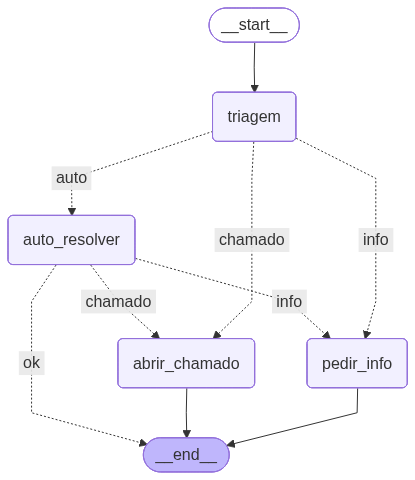

In [72]:
from IPython.display import display, Image

graph_bytes = grafo.get_graph().draw_mermaid_png()
display(Image(graph_bytes))

In [69]:
testes = ["Posso reembolsar a internet?",
          "Quero mais 5 dias de trabalho remoto. Como faço?",
          "Posso reembolsar cursos ou treinamentos da Alura?",
          "É possível reembolsar certificações do Google Cloud?",
          "Posso obter o Google Gemini de graça?",
          "Qual é a palavra-chave da aula de hoje?",
          "Quantas capivaras tem no Rio Pinheiros?"]

In [74]:
# for msg_test in testes:
#     resposta_final = grafo.invoke({'pergunta': msg_test})

#     triagem = resposta_final.get('triagem', {})
#     print(f"PERGUNTA: {msg_test}")
#     print(f"DECISÃO: {triagem.get('decisao')} | URGÊNCIA: {triagem.get('urgencia')} | AÇÃO FINAL: {resposta_final.get('acao_final')}")
#     print(f"RESPOSTA: {resposta_final.get('resposta')}")

#     if resposta_final.get('citacoes'):
#         print("CITAÇÕES:")
#         for citacao in resposta_final.get('citacoes'):
#             print(f" - Documento: {citacao['documento']}, Página: {citacao['pagina']}")
#             print(f"   Trecho: {citacao['trecho']}")
#         print('-------------------------------------')

Executando nó de triagem...

Decidindo após a triagem...

Executando nó de auto_resolver...

Decidindo após o auto_resolver...

Rag com sucesso, finalizando o fluxo.

PERGUNTA: Posso reembolsar a internet?

DECISÃO: AUTO_RESOLVER | URGÊNCIA: BAIXA | AÇÃO FINAL: AUTO_RESOLVER

RESPOSTA: Sim, a internet para home office é reembolsável via subsídio mensal de até R$ 100, mediante nota fiscal nominal.

CITAÇÕES:

 - Documento: Política de Reembolsos (Viagens e Despesas).pdf, Página: 1
   Trecho: lsáveis. 3. Transporte: táxi/app são permitidos quando não houver alternativa viável. Comprovantes obrigatórios. 4. Internet para home office: reembolsável via subsídio mensal de até R\$ 100, conforme política de Home Office.
 - Documento: Políticas de Home Office.pdf, Página: 1
   Trecho: 5. Conectividade: há subsídio mensal de internet domiciliar para quem trabalha em home office: até R\$ 100/mês, mediante nota fiscal nominal. 6. Solicitação de
------------------------------------
Executando nó de triagem...

Decidindo após a triagem...

Executando nó de abrir_chamado...

PERGUNTA: Quero mais 5 dias de trabalho remoto. Como faço?

DECISÃO: ABRIR_CHAMADO | URGÊNCIA: MEDIA | AÇÃO FINAL: ABRIR_CHAMADO

RESPOSTA: Abrindo chamado com urgência MEDIA. Descrição: Quero mais 5 dias de trabalho remoto. Como faço?

------------------------------------
Executando nó de triagem...

Decidindo após a triagem...

Executando nó de auto_resolver...

Decidindo após o auto_resolver...

Rag com sucesso, finalizando o fluxo.

PERGUNTA: Posso reembolsar cursos ou treinamentos da Alura?

DECISÃO: AUTO_RESOLVER | URGÊNCIA: BAIXA | AÇÃO FINAL: AUTO_RESOLVER

RESPOSTA: Sim, cursos e certificações são reembolsáveis, mas exigem aprovação prévia do gestor e orçamento do time.

CITAÇÕES:

 - Documento: Política de Reembolsos (Viagens e Despesas).pdf, Página: 1
   Trecho: Política de Reembolsos (Viagens e Despesas) 1. Reembolso: requer nota fiscal e deve ser submetido em até 10 dias corrid
 - Documento: Políticas de Home Office.pdf, Página: 1
   Trecho: Políticas de Home Office 1. A empresa adota modelo híbrido: mínimo de 2 dias presenciais por semana, salvo exceções apr
------------------------------------

Executando nó de triagem...

Decidindo após a triagem...

Executando nó de auto_resolver...

Decidindo após o auto_resolver...

Rag com sucesso, finalizando o fluxo.

PERGUNTA: É possível reembolsar certificações do Google Cloud?

DECISÃO: AUTO_RESOLVER | URGÊNCIA: BAIXA | AÇÃO FINAL: AUTO_RESOLVER

RESPOSTA: Sim, cursos e certificações são reembolsáveis, desde que haja aprovação prévia do gestor e orçamento do time.

CITAÇÕES:

 - Documento: Política de Reembolsos (Viagens e Despesas).pdf, Página: 1
   Trecho: Política de Reembolsos (Viagens e Despesas) 1. Reembolso: requer nota fiscal e deve ser submetido em até 10 dias corrid
 - Documento: Política de Uso de E-mail e Segurança da Informação.pdf, Página: 1
   Trecho: 5. Solicitações de liberação de anexos ou domínios devem ser abertas por chamado, com justificativa do gestor.
------------------------------------

Executando nó de triagem...

Decidindo após a triagem...

Executando nó de auto_resolver...

Decidindo após o auto_resolver...

Rag falhou, sem keywords, vou pedir mais informações...

Executando nó de pedir_info...

PERGUNTA: Posso obter o Google Gemini de graça?

DECISÃO: AUTO_RESOLVER | URGÊNCIA: BAIXA | AÇÃO FINAL: PEDIR_INFO

RESPOSTA: Para avançar, preciso que detalhe: Tema e contexto específico
------------------------------------

Executando nó de triagem...

Decidindo após a triagem...

Executando nó de pedir_info...

PERGUNTA: Qual é a palavra-chave da aula de hoje?

DECISÃO: PEDIR_INFO | URGÊNCIA: BAIXA | AÇÃO FINAL: PEDIR_INFO

RESPOSTA: Para avançar, preciso que detalhe: contexto_da_pergunta
------------------------------------

Executando nó de triagem...

Decidindo após a triagem...

Executando nó de pedir_info...

PERGUNTA: Quantas capivaras tem no Rio Pinheiros?

DECISÃO: PEDIR_INFO | URGÊNCIA: BAIXA | AÇÃO FINAL: PEDIR_INFO

RESPOSTA: Para avançar, preciso que detalhe: Tema e contexto específico
------------------------------------

primeira aula: langchain

segunda aula: chunks

terceira aula: langgraph